# Imports

In [1]:
import math
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Load Image

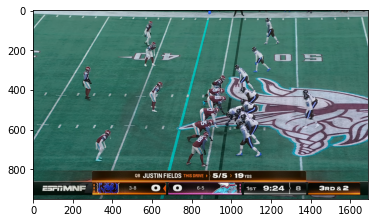

In [2]:
# load image as gray scale
img = cv2.imread("./test_image.png")
plt.imshow(img)

# Apply Grayscale

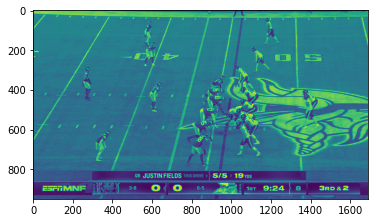

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

# Mask Score Bar

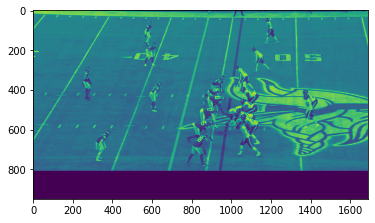

In [4]:
# masking score bar
mask_height = int(gray.shape[0] * 0.85)
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.rectangle(mask, (0, 0), (gray.shape[1], mask_height), (255), thickness=-1)

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, mask)
plt.imshow(masked_gray)

# Apply Gaussian Blur

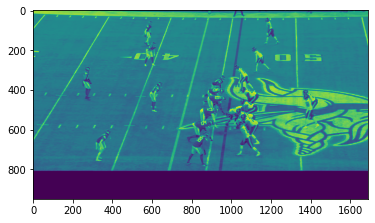

In [5]:
# Apply Gaussian blur
blurred = cv2.GaussianBlur(masked_gray, (5, 5), 0)
plt.imshow(blurred)

# Detect Edges

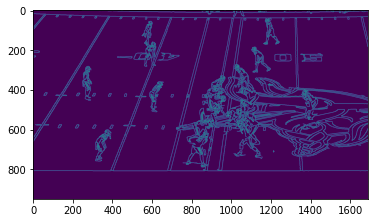

In [6]:
# Edge detection
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged)

# Find Contours and Filter them

In [7]:
# Find contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [37]:
# store contours
digits = list()
detected_numbers = list()
buffer = 10  # for OCR detection

# Loop over the contours
for i, c in enumerate(contours):
    # Compute the bounding box for the contour then extract the digits
    (x, y, w, h) = cv2.boundingRect(c)
    if 80 >= h >= 30 and 120 >= w >= 75:  # Filter based on typical number size
#         if i == 382 or i == 383 or i == 385 or i == 400:
#             print(w, h, i, x, y)
        digit = gray[y - buffer:y + h + buffer, x - buffer:x + w + buffer]
        digits.append(digit)
        cv2.imwrite(f"./line_number_recognition/digit-{i}.jpg", digit)
        
        text = pytesseract.image_to_string(digits[-1], config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
        if text.strip():
            detected_numbers.append((text.strip(), (x - buffer, y - buffer, x + w + buffer, y + h + buffer), digit))
        
print(f"Length of candidate digits detected: {len(digits)}")
print(f"Length of numbers detected: {len(detected_numbers)}")

Length of candidate digits detected: 17
Length of numbers detected: 3


In [38]:
rm ./line_number_recognition/digit-*

In [41]:
for a, b, c in detected_numbers:
    print(a)

55
5
2


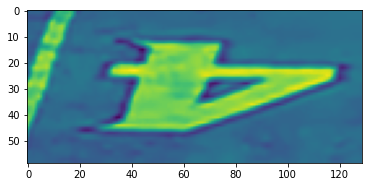

In [43]:
plt.imshow(detected_numbers[2][2])

# Parse Number from Image

In [81]:
digit_selection = -4

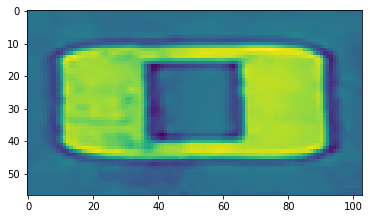

In [82]:
plt.imshow(digits[digit_selection])

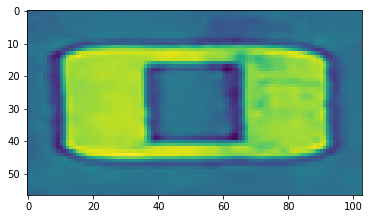

In [83]:
flipped_image = cv2.flip(digits[digit_selection], -1)
plt.imshow(flipped_image)

In [84]:
text = pytesseract.image_to_string(flipped_image, config='--psm 6 --oem 3 -c tessedit_char_whitelist=012345')
print(text, text.strip())

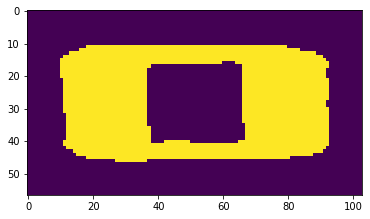

In [85]:
_, thresholded_image = cv2.threshold(flipped_image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image)

In [86]:
text = pytesseract.image_to_string(thresholded_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=012345')
print(text, text.strip())